In [34]:
import pandas as pd

# Memuat data dari file CSV
data = pd.read_csv('/home/ramma/assessment-solution-april/data/ingredient.csv')


In [36]:
import pandas as pd
from scipy.stats import f_oneway
from sklearn.preprocessing import StandardScaler

# Membaca data
data = pd.read_csv('/home/ramma/assessment-solution-april/data/ingredient.csv')

# 1. Statistik Deskriptif
print("Descriptive Statistics:")
print(data.describe())

# 2. Pembersihan Data
# Menghapus baris dengan nilai NaN di seluruh dataset
data_cleaned = data.dropna()

# Jika diperlukan, tangani outlier (misalnya, dengan metode IQR)
# Menghitung IQR untuk setiap kolom
Q1 = data_cleaned.quantile(0.25)
Q3 = data_cleaned.quantile(0.75)
IQR = Q3 - Q1

# Menghapus outlier menggunakan IQR
data_cleaned = data_cleaned[~((data_cleaned < (Q1 - 1.5 * IQR)) | (data_cleaned > (Q3 + 1.5 * IQR))).any(axis=1)]

# 3. Standarisasi Data
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_cleaned), columns=data_cleaned.columns)

# 4. Uji ANOVA antara semua kolom
columns = data_scaled.columns
anova_results = {}

# Menghitung ANOVA untuk setiap kolom dibandingkan dengan kolom lainnya
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        col1 = columns[i]
        col2 = columns[j]
        
        # Menghapus baris dengan nilai NaN setelah pembersihan
        data_pair = data_scaled[[col1, col2]].dropna()
        
        # Uji ANOVA
        f_stat, p_value = f_oneway(data_pair[col1], data_pair[col2])
        
        # Simpan hasil ANOVA
        anova_results[(col1, col2)] = (f_stat, p_value)

# Menampilkan hasil ANOVA
print("\nANOVA Results:")
for (col1, col2), (f_stat, p_value) in anova_results.items():
    print(f"Between '{col1}' and '{col2}':")
    print(f"  F-statistic: {f_stat:.4f}")
    print(f"  p-value: {p_value:.4f}")
    if p_value < 0.05:
        print("  There is a significant difference between these columns.")
    else:
        print("  There is no significant difference between these columns.")
    print()


Descriptive Statistics:
                a           b           c           d           e           f  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

                g           h           i  
count  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009  
std      1.423153    0.497219    0.097439  
min      5.430000    0.000000    0.000000  
25%      8.240000    0.000

In [26]:
# Statistik deskriptif
descriptive_stats = data.describe()
descriptive_stats

,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [4]:
from scipy import stats

# Uji normalitas
normality_tests = {col: stats.shapiro(data[col].dropna()) for col in data.columns}
print(normality_tests)

{'a': ShapiroResult(statistic=0.867572282422485, pvalue=1.0766712928973806e-12), 'b': ShapiroResult(statistic=0.9457623069859675, pvalue=3.465542692293627e-07), 'c': ShapiroResult(statistic=0.6993364173009196, pvalue=2.3909212700628454e-19), 'd': ShapiroResult(statistic=0.9434125977963359, pvalue=2.0831562415960383e-07), 'e': ShapiroResult(statistic=0.9196619139626909, pvalue=2.175031659381621e-09), 'f': ShapiroResult(statistic=0.44161768779031485, pvalue=2.1721880356825683e-25), 'g': ShapiroResult(statistic=0.793867908360201, pvalue=4.286584041376023e-16), 'h': ShapiroResult(statistic=0.4085650688572171, pvalue=5.383301973907288e-26), 'i': ShapiroResult(statistic=0.6532001093351217, pvalue=1.1566680199469555e-20)}


Matriks Korelasi:


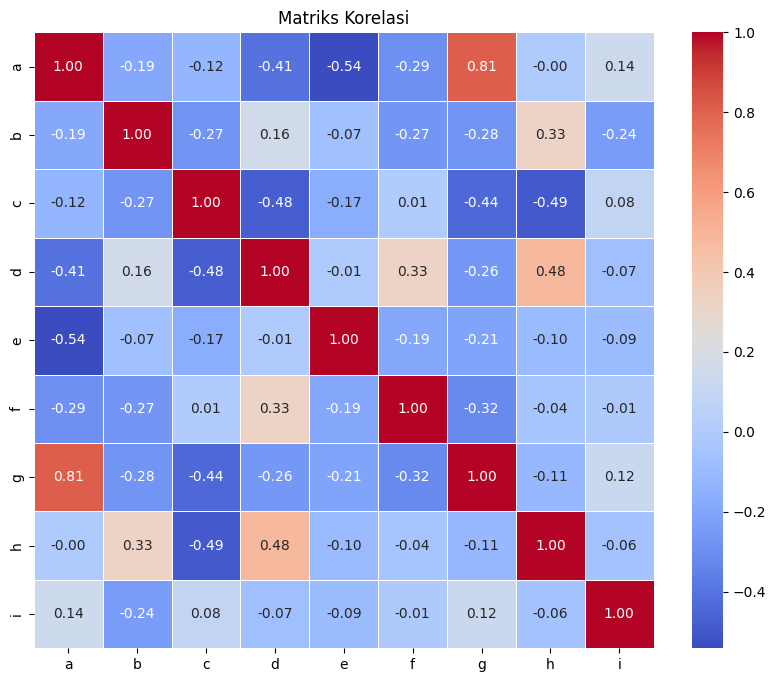

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Menghitung matriks korelasi
correlation_matrix = data.corr()

# Menampilkan matriks korelasi
print("Matriks Korelasi:")
correlation_matrix

# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi')
plt.show()

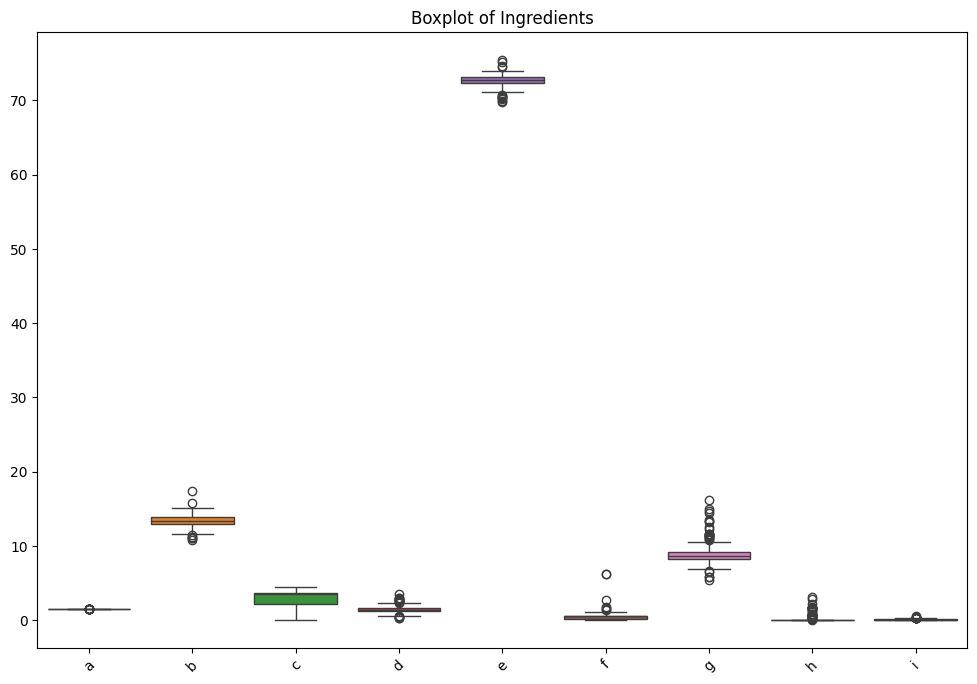

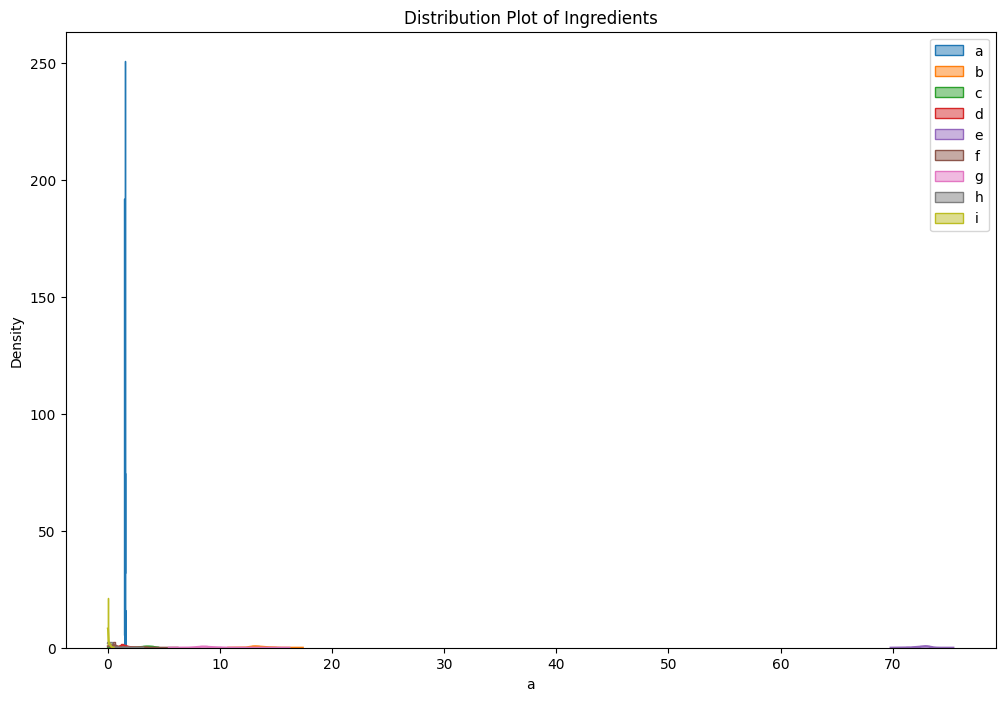

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Membaca data
data = pd.read_csv('/home/ramma/assessment-solution-april/data/ingredient.csv')

# Visualisasi Boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=data)
plt.title('Boxplot of Ingredients')
plt.xticks(rotation=45)
plt.show()

# Visualisasi Plot Distribusi
plt.figure(figsize=(12, 8))
for column in data.columns:
    sns.histplot(data[column], kde=True, label=column, element='step', stat='density', common_norm=False)
plt.title('Distribution Plot of Ingredients')
plt.legend()
plt.show()


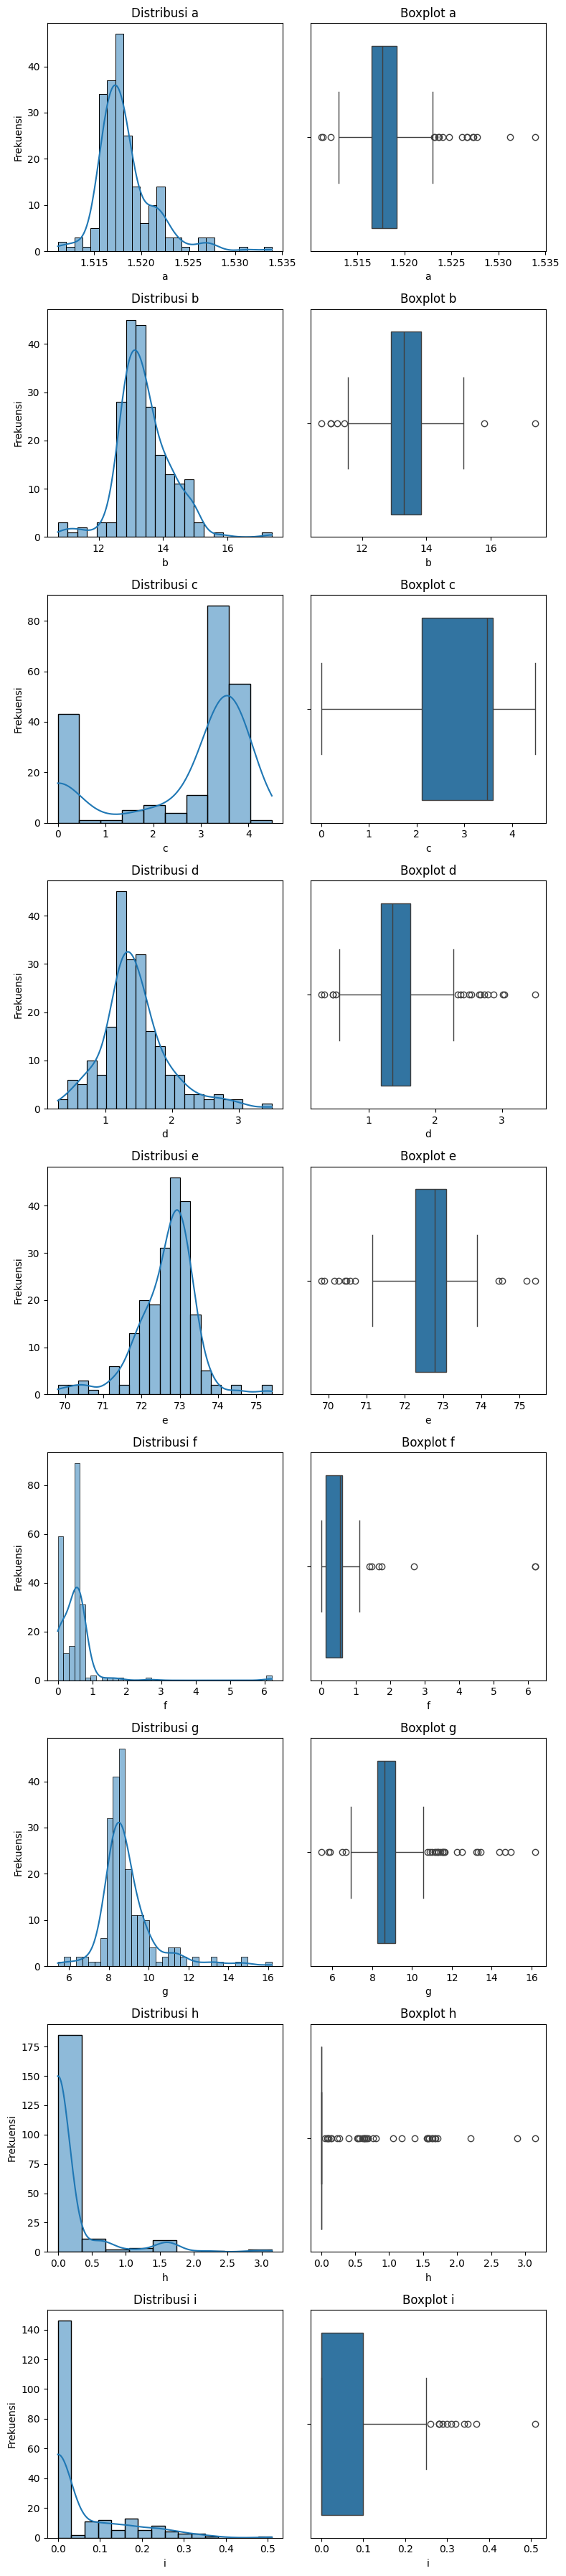

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Memuat data
data = pd.read_csv('/home/ramma/assessment-solution-april/data/ingredient.csv')

# Menentukan jumlah kolom
num_columns = len(data.columns)

# Membuat figure dan axes untuk histogram dan boxplot
fig, axes = plt.subplots(nrows=num_columns, ncols=2, figsize=(8, 4 * num_columns))

# Loop untuk plot histogram dan boxplot
for i, column in enumerate(data.columns):
    # Plot histogram
    sns.histplot(data[column], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribusi {column}')
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel('Frekuensi')
    
    # Plot boxplot
    sns.boxplot(x=data[column], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot {column}')
    axes[i, 1].set_xlabel(column)

# Menyesuaikan layout
plt.tight_layout()
plt.show()


Hasil Klastering dengan KMeans:
         a      b     c     d      e     f      g    h     i  Cluster
0  1.51735  13.02  3.54  1.69  72.73  0.54   8.44  0.0  0.07        0
2  1.52300  13.31  3.58  0.82  71.99  0.12  10.17  0.0  0.03        1
3  1.51768  12.56  3.52  1.43  73.15  0.57   8.54  0.0  0.00        0
4  1.51813  13.43  3.98  1.18  72.49  0.58   8.15  0.0  0.00        0
5  1.51721  12.87  3.48  1.33  73.04  0.56   8.43  0.0  0.00        0


/tmp/ipykernel_206105/3832781045.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Cluster'] = clusters


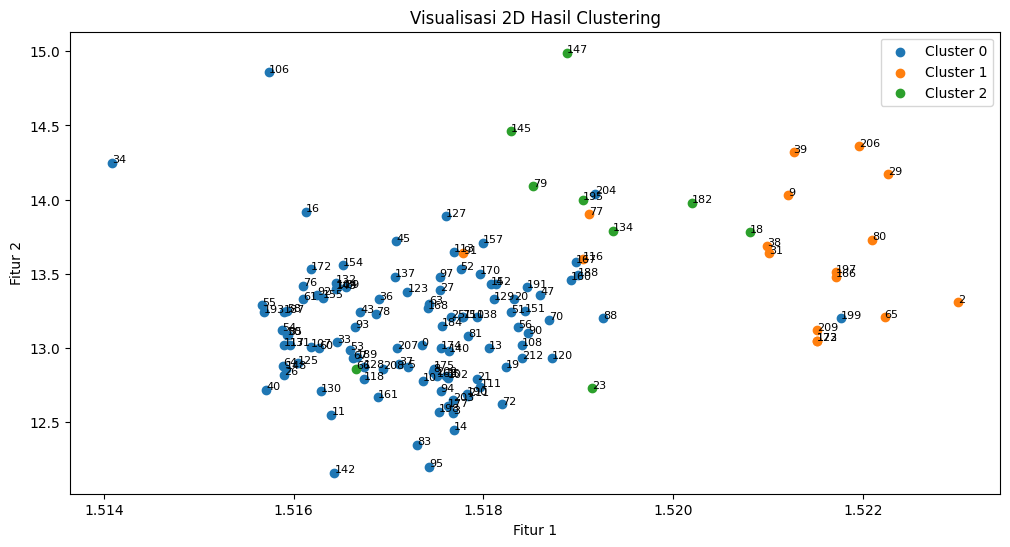

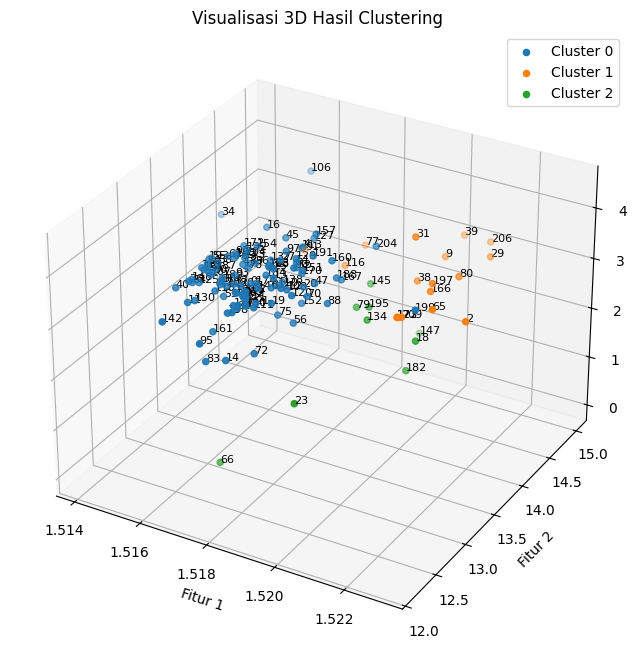

Hasil Klastering dengan DBSCAN:
         a      b     c     d      e     f      g    h     i  Cluster
0  1.51735  13.02  3.54  1.69  72.73  0.54   8.44  0.0  0.07       -1
2  1.52300  13.31  3.58  0.82  71.99  0.12  10.17  0.0  0.03       -1
3  1.51768  12.56  3.52  1.43  73.15  0.57   8.54  0.0  0.00       -1
4  1.51813  13.43  3.98  1.18  72.49  0.58   8.15  0.0  0.00       -1
5  1.51721  12.87  3.48  1.33  73.04  0.56   8.43  0.0  0.00        0


/tmp/ipykernel_206105/3832781045.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Cluster'] = clusters


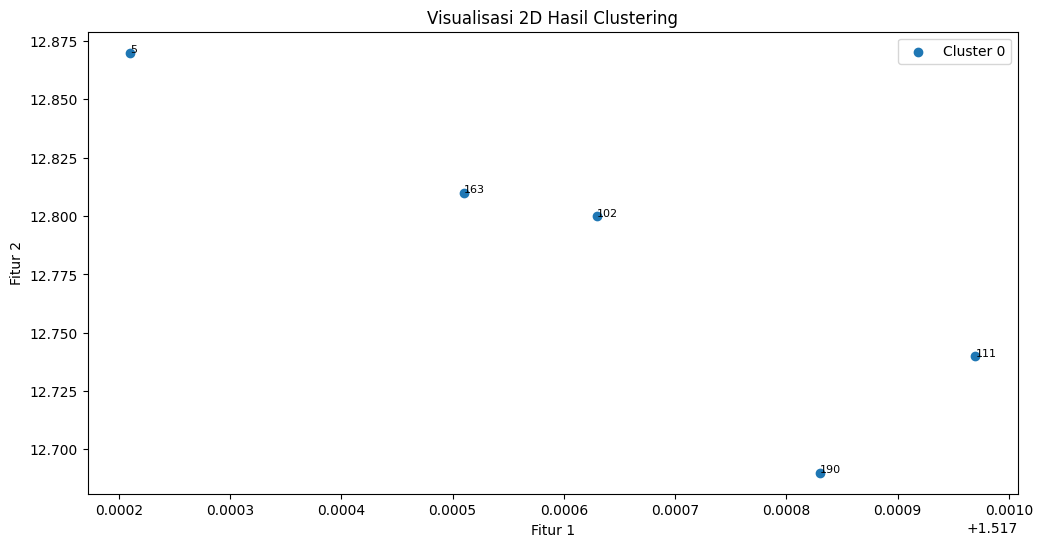

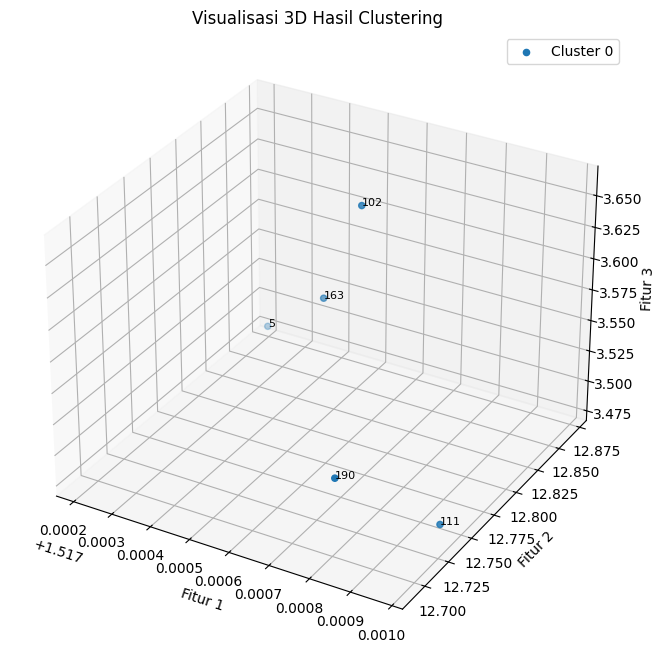

/tmp/ipykernel_206105/3832781045.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Cluster'] = clusters


Hasil Klastering dengan Agglomerative Clustering:
         a      b     c     d      e     f      g    h     i  Cluster
0  1.51735  13.02  3.54  1.69  72.73  0.54   8.44  0.0  0.07        0
2  1.52300  13.31  3.58  0.82  71.99  0.12  10.17  0.0  0.03        1
3  1.51768  12.56  3.52  1.43  73.15  0.57   8.54  0.0  0.00        0
4  1.51813  13.43  3.98  1.18  72.49  0.58   8.15  0.0  0.00        0
5  1.51721  12.87  3.48  1.33  73.04  0.56   8.43  0.0  0.00        0


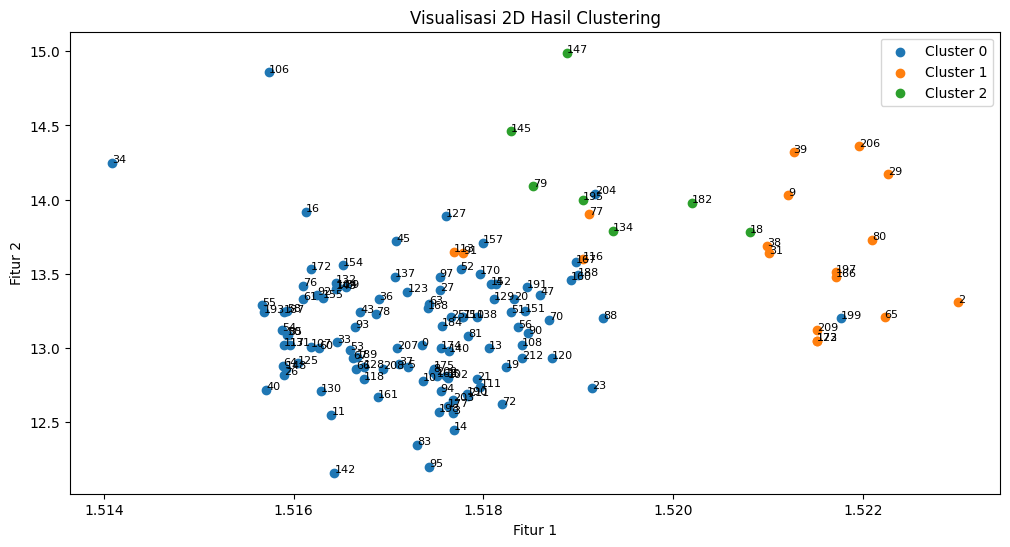

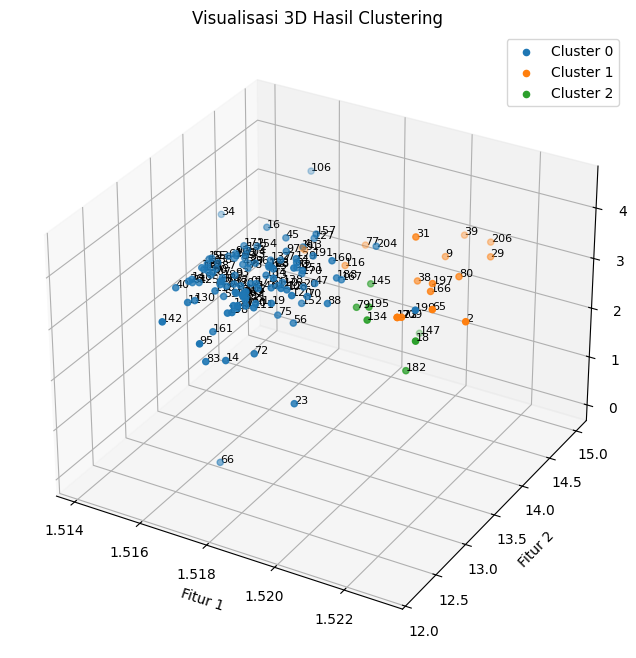

Hasil Klastering dengan Gaussian Mixture Model:
         a      b     c     d      e     f      g    h     i  Cluster
0  1.51735  13.02  3.54  1.69  72.73  0.54   8.44  0.0  0.07        0
2  1.52300  13.31  3.58  0.82  71.99  0.12  10.17  0.0  0.03        1
3  1.51768  12.56  3.52  1.43  73.15  0.57   8.54  0.0  0.00        0
4  1.51813  13.43  3.98  1.18  72.49  0.58   8.15  0.0  0.00        0
5  1.51721  12.87  3.48  1.33  73.04  0.56   8.43  0.0  0.00        0


/tmp/ipykernel_206105/3832781045.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Cluster'] = clusters


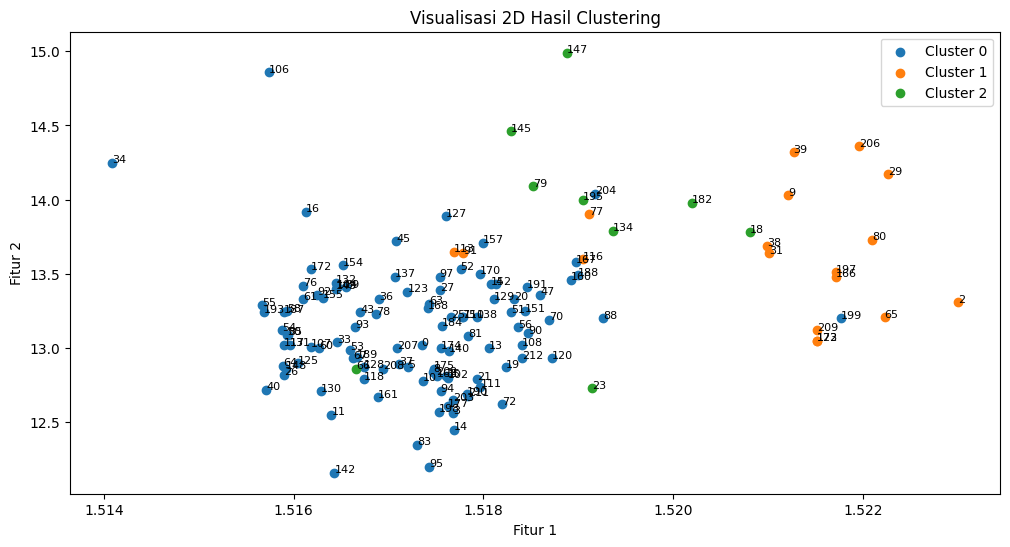

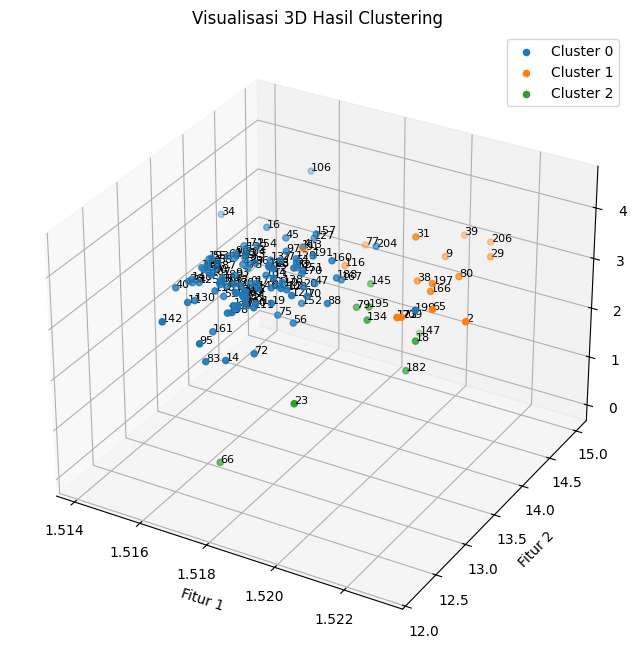

Hasil Klastering dengan Mean Shift:
         a      b     c     d      e     f      g    h     i  Cluster
0  1.51735  13.02  3.54  1.69  72.73  0.54   8.44  0.0  0.07        0
2  1.52300  13.31  3.58  0.82  71.99  0.12  10.17  0.0  0.03        1
3  1.51768  12.56  3.52  1.43  73.15  0.57   8.54  0.0  0.00        0
4  1.51813  13.43  3.98  1.18  72.49  0.58   8.15  0.0  0.00        0
5  1.51721  12.87  3.48  1.33  73.04  0.56   8.43  0.0  0.00        0


/tmp/ipykernel_206105/3832781045.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Cluster'] = clusters


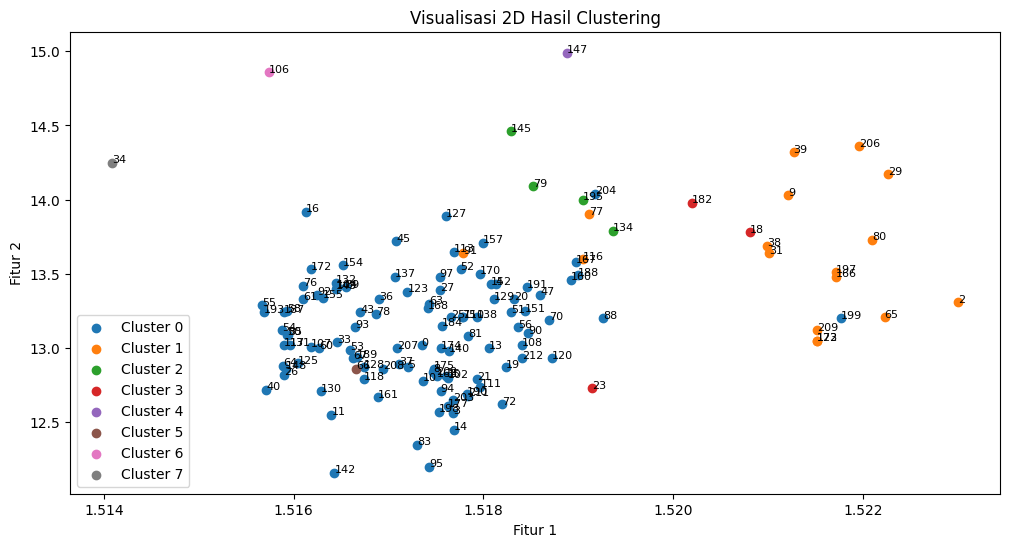

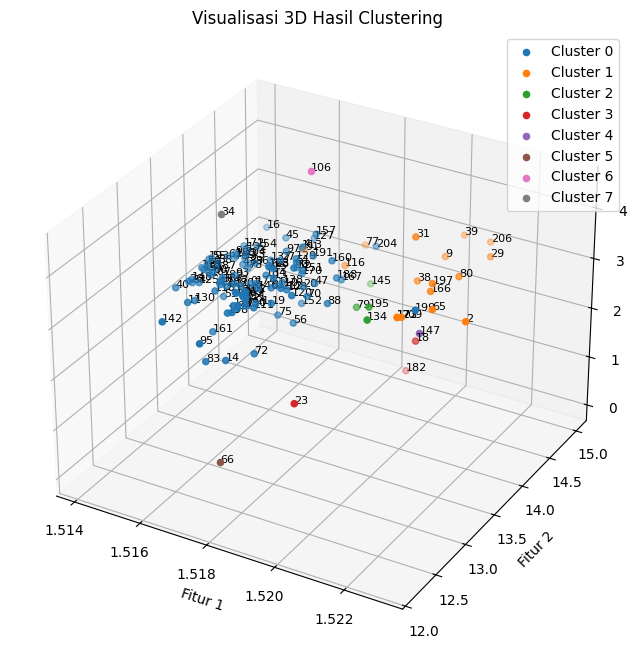

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MeanShift
from sklearn.mixture import GaussianMixture
from mpl_toolkits.mplot3d import Axes3D

# Memuat data
data = pd.read_csv('/home/ramma/assessment-solution-april/data/ingredient.csv')

# Mengidentifikasi dan menghapus outlier
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
    return filtered_df

# Identifikasi dan hapus outlier
filtered_data = remove_outliers_iqr(data)

# Standarisasi data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_data)

# Fungsi visualisasi clustering
def plot_clusters(data, clusters, num_clusters):
    plt.figure(figsize=(12, 6))
    for i in range(num_clusters):
        cluster_data = data[clusters == i]
        plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {i}')
        for idx, row in cluster_data.iterrows():
            plt.text(row.iloc[0], row.iloc[1], f'{idx}', fontsize=8)
    plt.xlabel('Fitur 1')
    plt.ylabel('Fitur 2')
    plt.title('Visualisasi 2D Hasil Clustering')
    plt.legend()
    plt.show()

    if data.shape[1] > 2:
        fig = plt.figure(figsize=(12, 8))
        ax = fig.add_subplot(111, projection='3d')
        for i in range(num_clusters):
            cluster_data = data[clusters == i]
            scatter = ax.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], cluster_data.iloc[:, 2], label=f'Cluster {i}')
            for idx, row in cluster_data.iterrows():
                ax.text(row.iloc[0], row.iloc[1], row.iloc[2], f'{idx}', fontsize=8)
        ax.set_xlabel('Fitur 1')
        ax.set_ylabel('Fitur 2')
        ax.set_zlabel('Fitur 3')
        ax.set_title('Visualisasi 3D Hasil Clustering')
        ax.legend()
        plt.show()

# KMeans
print("Hasil Klastering dengan KMeans:")
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(scaled_data)
filtered_data['Cluster'] = clusters
print(filtered_data.head())
plot_clusters(filtered_data, clusters, 3)

# DBSCAN
print("Hasil Klastering dengan DBSCAN:")
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(scaled_data)
filtered_data['Cluster'] = clusters
print(filtered_data.head())
plot_clusters(filtered_data, clusters, len(set(clusters)) - (1 if -1 in clusters else 0))

# Agglomerative Clustering
print("Hasil Klastering dengan Agglomerative Clustering:")
agglomerative = AgglomerativeClustering(n_clusters=3)
clusters = agglomerative.fit_predict(scaled_data)
filtered_data['Cluster'] = clusters
print(filtered_data.head())
plot_clusters(filtered_data, clusters, 3)

# Gaussian Mixture Model (GMM)
print("Hasil Klastering dengan Gaussian Mixture Model:")
gmm = GaussianMixture(n_components=3, random_state=0)
clusters = gmm.fit_predict(scaled_data)
filtered_data['Cluster'] = clusters
print(filtered_data.head())
plot_clusters(filtered_data, clusters, 3)

# Mean Shift
print("Hasil Klastering dengan Mean Shift:")
mean_shift = MeanShift()
clusters = mean_shift.fit_predict(scaled_data)
filtered_data['Cluster'] = clusters
print(filtered_data.head())
plot_clusters(filtered_data, clusters, len(set(clusters)))
